## Resampling method

Resampling은 통계학에서 자주 이용되는 방법이다.

훈련 데이터로부터 데이터를 다시 뽑는 resampling 방법을 이용하여 적합된 모형에 대해 더 많은 정보를 얻을 수 있다.

주로 사용되는 resampling 방법에는 크게 두 가지가 있다.

* cross-validation

* bootstrap

두 방법 모두 통계적 학습에서 유용하게 사용된다.

Cross-validation은 테스트 에러를 추정하고, 모형의 성능을 측정하고, 적합한 flexibility를 가지는 모형을 선택할 수 있게 한다.

Bootstrap은 모수 추정에 대한 정확성을 측정할 수 있게 한다.

### Cross-validation

통계적 학습의 과정에서 항상 test error와 training error를 구분해야 한다.

테스트 에러는 트레이닝에 사용하지 않은 데이터로부터 발생하는 에러들의 평균이라고 볼 수 있다.

테스트 에러가 작은 모형이 좋은 모형이다.

정확한 테스트 에러를 계산하려면 매우 큰 테스트 데이터 셋이 존재해야 하나, 실제로는 그런 환경은 거의 조성되지 않는다.

이에 따라, 일반적으로 데이터의 일부는 트레이닝에 사용하고, 나머지는 남겨두어 테스트에 사용한다.

테스트에 사용하는 부분을 validation set 혹은 hold-out set이라고도 한다.

트레이닝 셋을 이용하여 모델을 적합하고, validation set을 이용하여 테스트 에러를 추정한다.

* 질적 변수에서는 MSE 등을 이용하고, 양적 변수에서는 misclassiffication rate을 이용한다.

가장 간단한 방법은 데이터 셋을 랜덤으로 나누어 하나는 훈련에 다른 하나는 테스트 에러 추정에 사용하는 것이다.

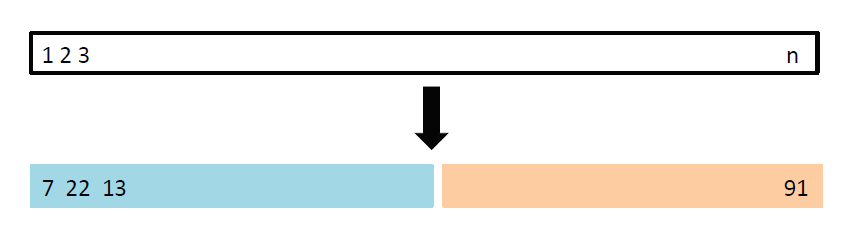

Validation set에 어떤 데이터가 속하는지는 순전히 랜덤으로 결정되기 때문에, 이 랜덤성에 따라 테스트 에러에 대한 추정치는 크게 변동할 수 있다.

또한 위 방법은 트레이닝에 전체 데이터의 절반만 이용되기 때문에, 전체 데이터를 사용하는 것보다 fitting이 부정확하게 이루어지고, 이에 따라 validation set을 이용한 test error의 추정치는 overestimate 될 가능성이 높다.

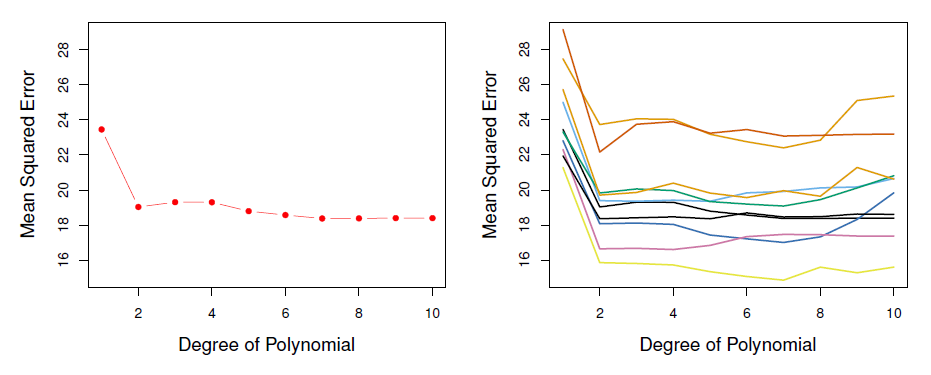

위 그림에서 왼쪽은 하나의 validation set으로 validation error를 모형의 차수에 따라 나타낸 것이다.

Validation error는 test error의 비편향 근사값으로 간주할 수 있다.

오른쪽은 이 방법을 서로 다른 validation set들에 반복 적용하여 얻은 것으로, 각각이 validation error를 나타낸다.

Validation error 자체의 변화량이 큰 것을 관찰할 수 있다.

### Leave-One-Out Cross-Validation

LOOCV 방법은 앞의 validation 방법과 비슷하나 단점을 보완하였다.

비슷한 크기로 두 셋을 나누는 대신, 하나의 관찰값 $(x_1, y_1)$이 validation에 사용된다.

나머지 데이터는 트레이닝에 이용하고, 적합이 끝나면 적합된 모형을 이용해 예측값 $\hat y_1$을 계산한다.

테스트 에러에 대한 추정치는 $\mathrm{MSE}_1 = (y_1 - \hat y_1)^2 $이다.

이는 테스트 에러에 대해 unbiased지만 분산이 매우 클 것이다.

다음에는 $(x_2, y_2)$를 validation set으로 두고, 나머지 데이터를 이용해 모형 적합을 거쳐, $\mathrm{MSE}_2 = (y_2 - \hat y_2)^2 $를 계산한다.

모든 데이터에 대해 위 과정을 반복하고, $\mathrm{MSE}_i$들을 계산할 수 있다.

테스트 MSE에 대한 LOOCV 추정량은 다음과 같다.

$$ \mathrm{CV}_{(n)} = \frac{1}{n} \sum_{i=1}^{n} \mathrm{MSE}_{i} $$

이를 그림으로 표현하면 다음과 같다.

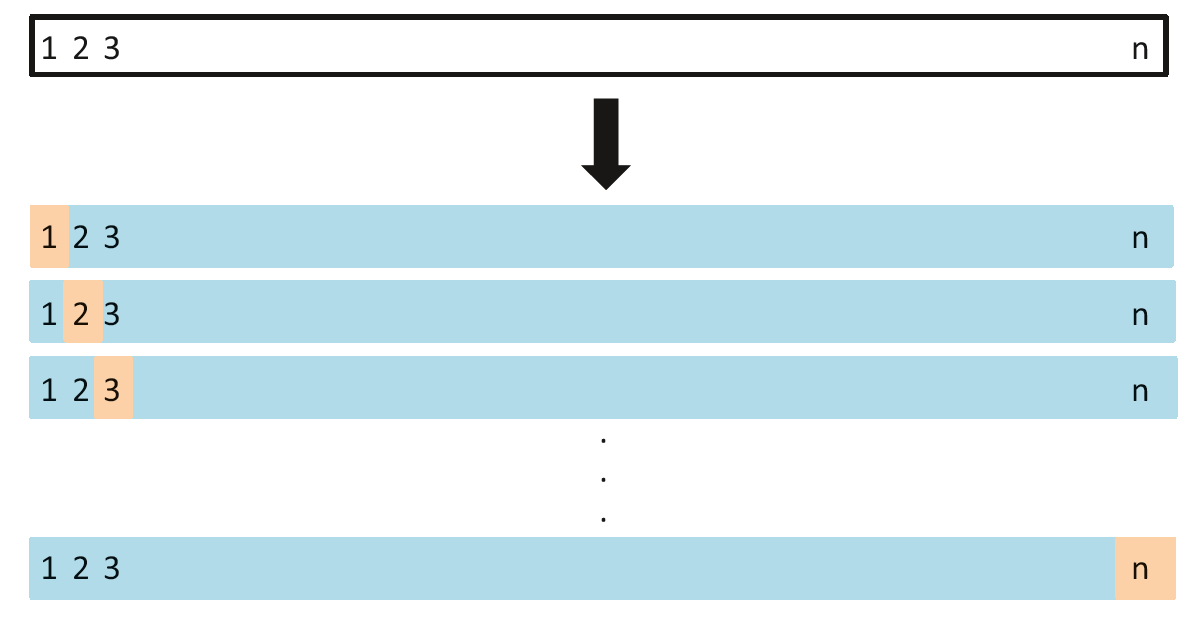

### k-fold Cross-Validation

LOOCV는 많은 장점을 지녔지만, 데이터의 총 수가 많으면 상당히 오랜 시간이 걸린다.

이 경우 k-fold CV 방법은 LOOCV의 대안이 된다.

k-fold 방법에서는 데이터를 랜덤하게 $k$ 개의 그룹으로 나눈다.

이 중 한 그룹이 validation set이고 나머지는 훈련에 사용된다. 훈련이 끝난 모형으로 validation set에 대해 MSE를 측정할 수 있다.

LOOCV의 경우와 마찬가지로, 모든 $k$ 개의 그룹이 validation set이 될 수 있으며, 이 때마다 나머지 그룹들이 훈련을 담당한다.

따라서 각 그룹에 대해 MSE가 측정되면 이것의 평균으로 테스트 에러에 대한 추정치를 계산한다.

$$ \mathrm{CV}_k = \frac{1}{k} \sum_{i=1}^{k} \mathrm{MSE}_i $$

아래 그림은 k-fold cross validation을 나타낸다.

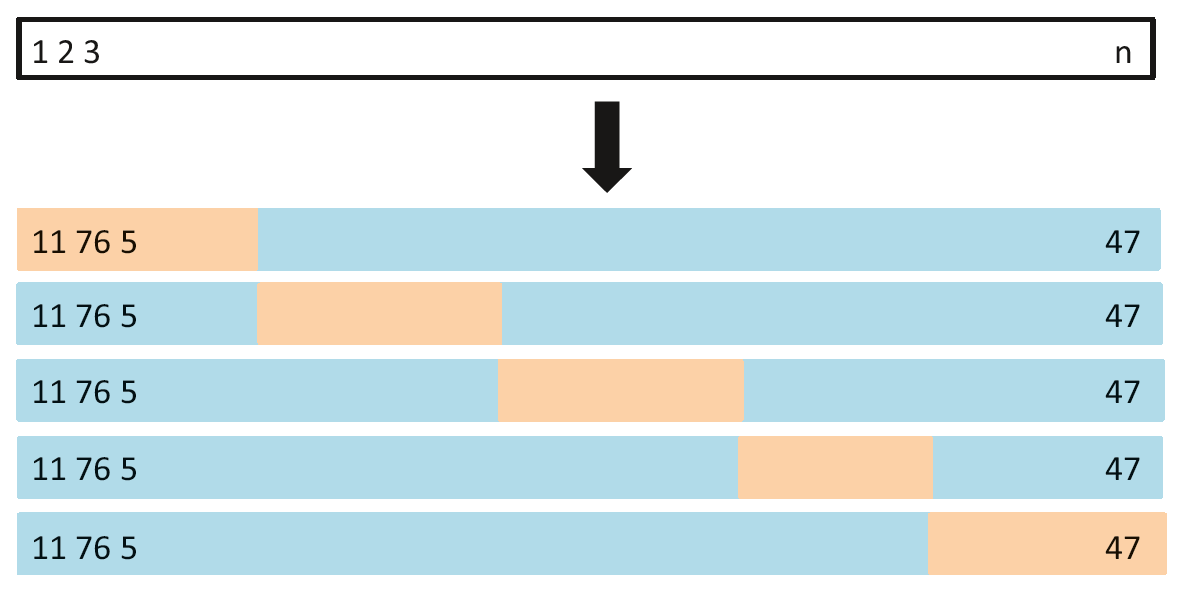

다음은 시뮬레이션 데이터를 이용하여 계산한 true test MSE와 추정된 test MSE의 비교이다.

파란색 선이 true test MSE이며, 이것에 대한 LOOCV 추정치가 검은 점선으로, 10-fold CV 추정치가 주황색으로 나타나 있다.

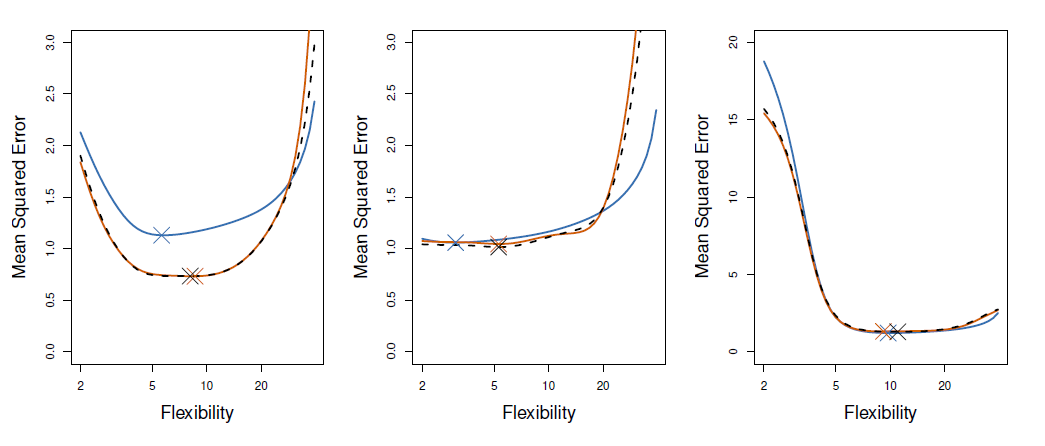

### Bias-variance trade-off for k-fold cross-validation

k-fold CV는 계산 비용 측면에서 LOOCV보다 유리할 뿐 아니라, 종종 LOOCV 보다 더 정확한 test error를 계산한다.

* LOOCV는 한번에 거의 모든 데이터를 트레이닝에 사용하기 때문에, bias를 줄이는 데에 있어서는 k-fold CV 보다 우월하다.

* 반면 k-fold CV는 variance 측면에서 LOOCV보다 나은 모습을 보인다. 이는 LOOCV의 훈련 데이터들은 겹치는 부분이 많기 때문에 높은 상관관계를 지니지만, k-fold CV는 겹치는 부분이 상대적으로 적기 때문이다.

  * 높은 상관관계를 지니는 값들의 표본평균은 상관관계가 없는 값들의 표본평균보다 높은 분산을 가진다.

적절한 k를 선택하는 문제는 결국 bias-variance trade-off 문제이며, 일반적으로 $k=5$ 혹은 $k=10$의 값이 이용된다.

### Cross-validation on classification problems

위에서는 $Y$가 양적 변수라고 가정하고 MSE를 이용하였다.

$Y$가 질적 변수일때도 마찬가지의 논의를 할 수 있다.

이 경우, LOOCV error rate은 다음과 같다.

$$ \mathrm{CV}_{(n)} = \frac{1}{n} \sum_{i=1}^{n} \mathrm{Err}_{i}, \quad \mathrm{Err}_{i} = \mathbb I _{y_i \neq \hat y_i}.  $$

k-fold CV error rate 또한 마찬가지로 정의된다.

#### 주의할 점

예를들어 5000개의 predictor 중 $Y$와 상관관계가 높은 100개의 predictor를 선택하여 logistic regression 등의 작업을 진행한다고 가정하자.

Cross-validation 방법을 적용할 때 주의할 점은 5000개의 predictor 중 100개를 선택하는 과정도 training에 포함되기 때문에, 전체 데이터가 아닌 training set만을 이용하여 100개의 predictor를 선택하여야 한다.

### Bootstrap

Bootstrap은 통계학에서 estimator의 정확성을 측정하는데 사용할 수 있는 유연하고 강력한 방법이다.

추정량의 표준오차나 신뢰구간을 계산하는 데에 사용할 수 있다.

만약 모집단의 분포를 이미 알고 있다면 시뮬레이션 방법을 통해 샘플을 계속 생성할 수 있다.

Bootstrap은 주어진 샘플을 다시 resampling하여 새로운 샘플을 만드는 과정이다.

* sampling with replacement

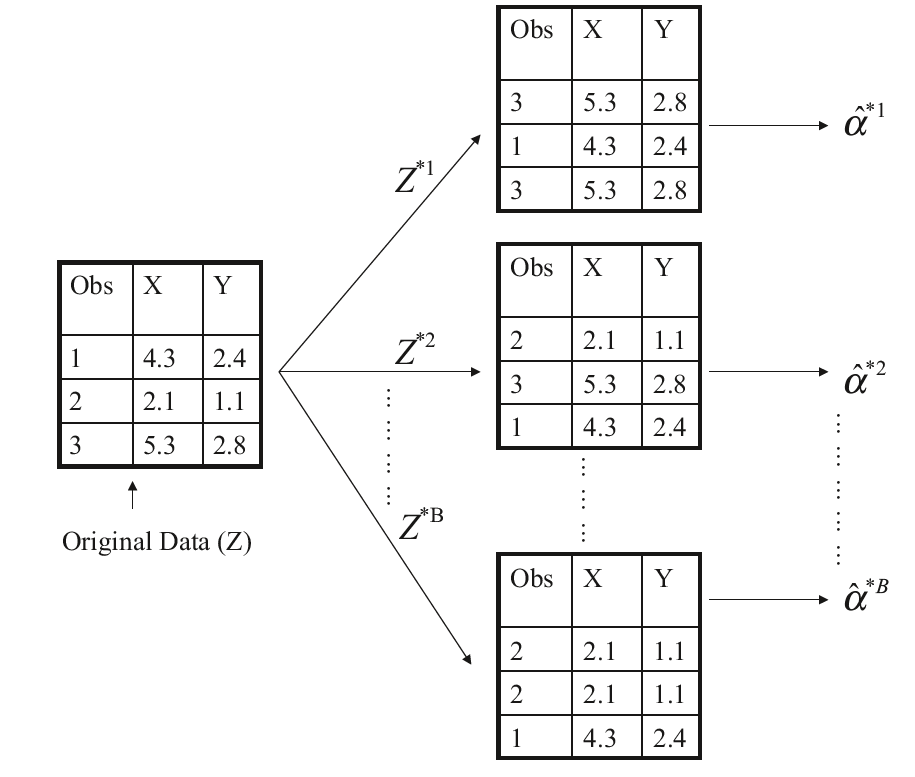

위 그림은 관찰값이 3개 있을 경우 bootstrap 방법에 대해 나타낸다.

3개의 관찰값을 중복 허용의 랜덤 샘플링하여 3개를 뽑아 새로운 데이터셋을 만들고 이를 이용하여 모수를 추정한다.

모수 $\alpha$에 대한 추정치는 각 bootstrap 단계인 $Z^{*r}$마다 계산할 수 있다. 이를 $\hat \alpha^{*r}$라 하자.

이를 $B$번 반복하여, $\hat \alpha^{*r}$들의 표본평균인 $\overline{ \hat \alpha^{*}} $를 bootstrap 추정량으로 삼는다.

Bootstrap 방법에 의한 $\alpha$의 추정량의 표준오차는 다음으로 추정한다.

$$ \mathrm{SE}_B (\hat \alpha) = \sqrt{\frac{1}{B-1} \sum_{r=1}^{B} \left( \hat \alpha^{*r} - \overline{ \hat \alpha^{*}} \right)^2} $$